# Evaluating word2vec and GloVe vectors

## GloVe

In [101]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

In [47]:
glove_wv50 = KeyedVectors.load_word2vec_format('../GloVe/vectors.txt', binary=False)
glove_wv100 = KeyedVectors.load_word2vec_format('../GloVe/vectors100.txt', binary=False)
glove_wv200 = KeyedVectors.load_word2vec_format('../GloVe/vectors200.txt', binary=False)

In [50]:
acc_glove_50, acc_glove_100, acc_glove_200 = glove_wv50.accuracy('google-questions.txt'), glove_wv100.accuracy('google-questions.txt'), glove_wv200.accuracy('google-questions.txt')

In [116]:
glove_results = []
glove_gram_results = []
glove_family_results = []
for acc in [acc_glove_50, acc_glove_100, acc_glove_200]:
    for i in range(0, len(acc)): 
        print(acc[i][acc[i].keys()[1]], len(acc[i]['correct']), (len(acc[i]['correct']) + len(acc[i]['incorrect'])))
    right = len(acc[-1]['correct'])
    total = len(acc[-1]['incorrect']) + right
    glove_results.append(float(right)/total)
    gram_right = len(acc[7]['correct'])
    gram_total = len(acc[7]['incorrect']) + right
    glove_gram_results.append(float(gram_right)/gram_total)
    family_right = len(acc[4]['correct'])
    family_total = len(acc[4]['incorrect']) + right
    glove_family_results.append(float(family_right)/family_total)
    print "--------"

(u'capital-common-countries', 9, 182)
(u'capital-world', 6, 169)
(u'currency', 0, 40)
(u'city-in-state', 2, 398)
(u'family', 101, 420)
(u'gram1-adjective-to-adverb', 4, 650)
(u'gram2-opposite', 0, 380)
(u'gram3-comparative', 42, 702)
(u'gram4-superlative', 33, 600)
(u'gram5-present-participle', 38, 552)
(u'gram6-nationality-adjective', 18, 633)
(u'gram7-past-tense', 35, 992)
(u'gram8-plural', 9, 702)
(u'gram9-plural-verbs', 8, 380)
('total', 305, 6800)
--------
(u'capital-common-countries', 12, 182)
(u'capital-world', 5, 169)
(u'currency', 0, 40)
(u'city-in-state', 5, 398)
(u'family', 119, 420)
(u'gram1-adjective-to-adverb', 0, 650)
(u'gram2-opposite', 0, 380)
(u'gram3-comparative', 36, 702)
(u'gram4-superlative', 31, 600)
(u'gram5-present-participle', 46, 552)
(u'gram6-nationality-adjective', 21, 633)
(u'gram7-past-tense', 50, 992)
(u'gram8-plural', 10, 702)
(u'gram9-plural-verbs', 10, 380)
('total', 345, 6800)
--------
(u'capital-common-countries', 6, 182)
(u'capital-world', 3, 169)


In [88]:
print glove_results

[0.04485294117647059, 0.05073529411764706, 0.03897058823529412]


## word2vec

In [90]:
sentences_file = open('sentences.txt', 'r')
sentences_text = sentences_file.read()
sentences_file.close()
sentences = [sentence.split() for sentence in sentences_text.split('\n')]

In [93]:
w2v_wv50 = Word2Vec(sentences, size=50, window=15, min_count=5, workers=4)
w2v_wv100 = Word2Vec(sentences, size=100, window=15, min_count=5, workers=4)
w2v_wv200 = Word2Vec(sentences, size=200, window=15, min_count=5, workers=4)

In [99]:
acc_w2v_50, acc_w2v_100, acc_w2v_200 = w2v_wv50.accuracy('google-questions.txt'), w2v_wv100.accuracy('google-questions.txt'), w2v_wv200.accuracy('google-questions.txt')

In [117]:
w2v_results = []
w2v_gram_results = []
w2v_family_results = []
for acc in [acc_w2v_50, acc_w2v_100, acc_w2v_200]:
    for i in range(0, len(acc)): 
        print(acc[i][acc[i].keys()[1]], len(acc[i]['correct']), (len(acc[i]['correct']) + len(acc[i]['incorrect'])))
    right = len(acc[-1]['correct'])
    total = len(acc[-1]['incorrect']) + right
    w2v_results.append(float(right)/total)
    gram_right = len(acc[7]['correct'])
    gram_total = len(acc[7]['incorrect']) + right
    w2v_gram_results.append(float(gram_right)/gram_total)
    family_right = len(acc[4]['correct'])
    family_total = len(acc[4]['incorrect']) + right
    w2v_family_results.append(float(family_right)/family_total)
    print "--------"

(u'capital-common-countries', 5, 182)
(u'capital-world', 2, 169)
(u'currency', 0, 40)
(u'city-in-state', 1, 398)
(u'family', 67, 420)
(u'gram1-adjective-to-adverb', 2, 650)
(u'gram2-opposite', 1, 380)
(u'gram3-comparative', 47, 702)
(u'gram4-superlative', 22, 600)
(u'gram5-present-participle', 19, 552)
(u'gram6-nationality-adjective', 12, 633)
(u'gram7-past-tense', 46, 992)
(u'gram8-plural', 18, 702)
(u'gram9-plural-verbs', 7, 380)
('total', 249, 6800)
--------
(u'capital-common-countries', 5, 182)
(u'capital-world', 4, 169)
(u'currency', 0, 40)
(u'city-in-state', 1, 398)
(u'family', 70, 420)
(u'gram1-adjective-to-adverb', 1, 650)
(u'gram2-opposite', 0, 380)
(u'gram3-comparative', 50, 702)
(u'gram4-superlative', 20, 600)
(u'gram5-present-participle', 17, 552)
(u'gram6-nationality-adjective', 8, 633)
(u'gram7-past-tense', 52, 992)
(u'gram8-plural', 15, 702)
(u'gram9-plural-verbs', 5, 380)
('total', 248, 6800)
--------
(u'capital-common-countries', 9, 182)
(u'capital-world', 2, 169)
(u'c

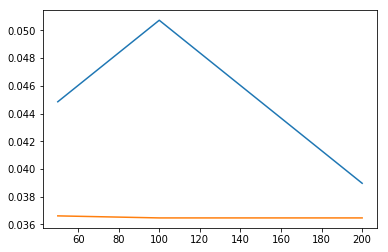

In [118]:
plt.plot([50, 100, 200], glove_results, [50, 100, 200], w2v_results)
plt.show()

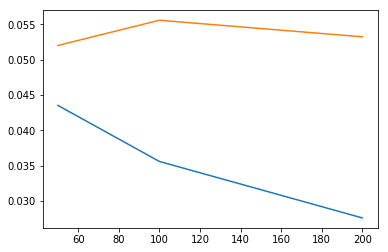

In [119]:
plt.plot([50, 100, 200], glove_gram_results, [50, 100, 200], w2v_gram_results)
plt.show()

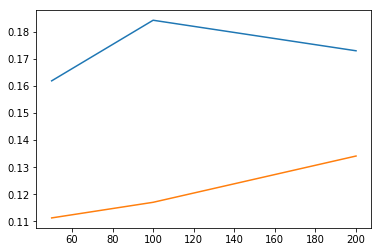

In [120]:
plt.plot([50, 100, 200], glove_family_results, [50, 100, 200], w2v_family_results)
plt.show()